In [1]:
import pandas as pd

# Read the two datasets
reviews_by_course_df = pd.read_csv('reviews_by_course.csv')
reviews_df = pd.read_csv('reviews.csv')

In [2]:
reviews_by_course_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140320 entries, 0 to 140319
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CourseId  140320 non-null  object
 1   Review    140317 non-null  object
 2   Label     140320 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107018 entries, 0 to 107017
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      107018 non-null  int64 
 1   Review  107018 non-null  object
 2   Label   107018 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


There are 1835 unique courses in the dataset.

In [4]:
# unique course ID
len(reviews_by_course_df["CourseId"].unique())

1835

Let's find courses with the highest number of reviews/ratings for the course.
And print top20

In [5]:
# find most popular courses
reviews_number = reviews_by_course_df["CourseId"].value_counts()
# show top20 courses by the reviews number
print(reviews_number[:20])

machine-learning                          8570
learning-how-to-learn                     7090
python                                    5906
python-data                               2372
python-network-data                       1844
data-scientists-tools                     1637
html-css-javascript                       1544
r-programming                             1292
grammar-punctuation                       1267
ml-foundations                            1247
html-css-javascript-for-web-developers    1122
childnutrition                            1117
html                                      1101
food-and-health                            990
python-databases                           940
calculus1                                  899
negotiation-skills                         835
web-frameworks                             832
happiness                                  805
work-smarter-not-harder                    768
Name: CourseId, dtype: int64


Not surprising that Machine Learning by Andrew Ng has the most ratings. Perhaps, it is one of the best courses on Coursera!
Let's see how ahead of other top20 courses it is.

[Text(0.5, 0, 'number of ratings'), Text(0, 0.5, 'Course ID')]

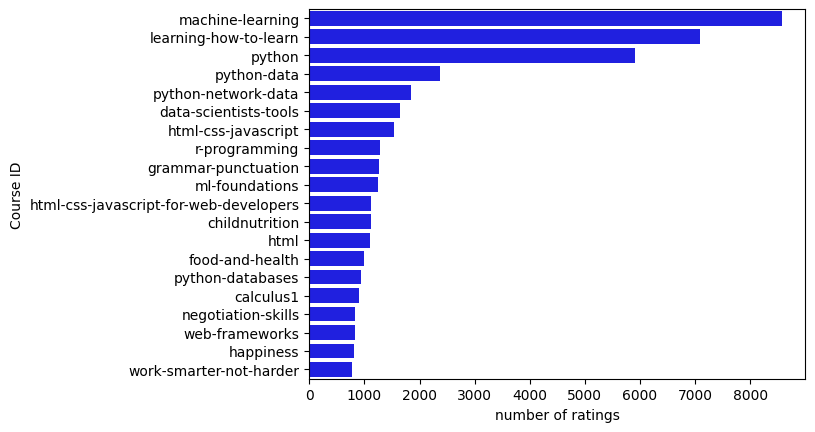

In [6]:
# plot barplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(y=reviews_number[:20].index, x=reviews_number[:20],color="b").set(xlabel="number of ratings", ylabel="Course ID")

Time to find average ratings of the courses.

C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_11760\4206460610.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_rating = reviews_by_course_df.groupby("CourseId").mean().sort_values("Label", ascending=False)
C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_11760\4206460610.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_rating, kde=False).set(xlabel="average rating", ylabel="number of courses")


[Text(0.5, 0, 'average rating'), Text(0, 0.5, 'number of courses')]

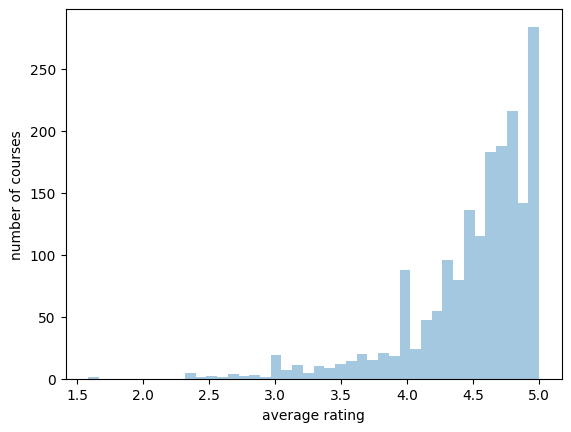

In [7]:
# average rating of the course
average_rating = reviews_by_course_df.groupby("CourseId").mean().sort_values("Label", ascending=False)
# plot histogram
sns.distplot(average_rating, kde=False).set(xlabel="average rating", ylabel="number of courses")

In [8]:
# number of courses with average rating 5.0
av_rating_5 = int(average_rating[average_rating.Label==5.0].count())
print("Number of courses with average rating 5.0:")
print(av_rating_5)
print("% of the total number of courses:")
print(av_rating_5/len(reviews_by_course_df["CourseId"].unique())*100)

Number of courses with average rating 5.0:
239
% of the total number of courses:
13.024523160762943


In [9]:
# extract review numbers for courses with average rating 5.0
df_av_rating_5 = pd.DataFrame(reviews_number)[average_rating.Label==5.0]
# explore statistics
print(df_av_rating_5.describe())

         CourseId
count  239.000000
mean     3.874477
std      3.909821
min      1.000000
25%      1.000000
50%      3.000000
75%      5.000000
max     32.000000


C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_11760\4220655541.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_av_rating_5 = pd.DataFrame(reviews_number)[average_rating.Label==5.0]


Let's turn to reviews and find the average number of characters in the review.

count    1835.000000
mean      138.469118
std        94.903274
min         3.500000
25%        94.138889
50%       127.505882
75%       165.911585
max      2076.000000
Name: Review_len, dtype: float64


C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_11760\2852665884.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_len = reviews_by_course_df.groupby("CourseId").mean().sort_values("Review_len", ascending=False)
C:\Users\Soham Tolwala\AppData\Local\Temp\ipykernel_11760\2852665884.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(average_len["Review_len"], kde=False).set(xlabel="average number of characters in review", ylabel="number of

[Text(0.5, 0, 'average number of characters in review'),
 Text(0, 0.5, 'number of courses')]

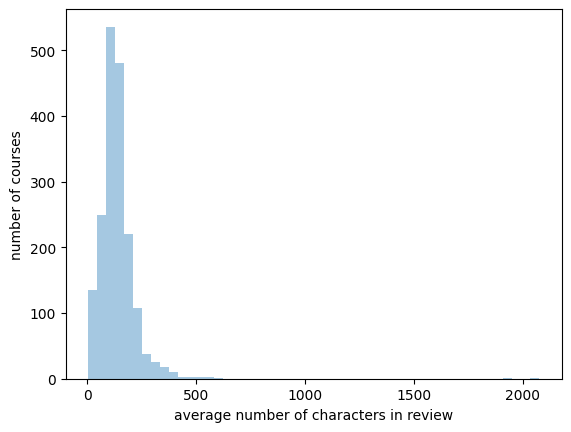

In [10]:
# compute the number of characters in the review
reviews_by_course_df["Review_len"] = reviews_by_course_df["Review"].str.len()
# compute the average number of characters in the review for every course
average_len = reviews_by_course_df.groupby("CourseId").mean().sort_values("Review_len", ascending=False)
# explore statistics
print(average_len.Review_len.describe())
#plot histogram
sns.distplot(average_len["Review_len"], kde=False).set(xlabel="average number of characters in review", ylabel="number of courses",)

Put number of reviews, average rating and average length of the review together in one DataFrame

In [11]:
# Merge datasets on index and create new DataFrame "analysis"
# first we will transform most_reviews from Series to DataFrame
df_reviews_number = pd.DataFrame(reviews_number)
# merge df_reviews_number and average_rating
analysis = pd.merge(df_reviews_number, average_rating,  right_index=True, left_index=True)
# transform average_len from Series to DataFrame
df_average_len = pd.DataFrame(average_len.Review_len)
# merge analysis and df_average_len
analysis = pd.merge(analysis, df_average_len,  right_index=True, left_index=True)
# rename columns
analysis.columns = ["reviews_number", "av_rating", "av_review_len"]
# show first 5 rows
analysis.head()

,reviews_number,av_rating,av_review_len
machine-learning,8570,4.899067,129.918436
learning-how-to-learn,7090,4.858392,133.896333
python,5906,4.778869,102.380799
python-data,2372,4.836425,88.512226
python-network-data,1844,4.767896,100.733731


In [12]:
# Let's first explore correlations 
analysis.corr()

,reviews_number,av_rating,av_review_len
reviews_number,1.000000,0.054449,-0.023933
av_rating,0.054449,1.000000,-0.252136
av_review_len,-0.023933,-0.252136,1.000000


[(0.0, 500.0),
 Text(0.5, 0, 'average number of characters in review'),
 Text(0, 0.5, 'average rating')]

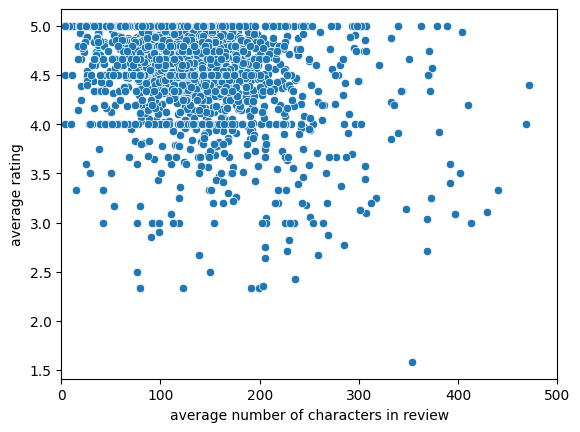

In [13]:
# plot scatter plot with av_review_len as x and av_rating as y
sns.scatterplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(0,500), xlabel="average number of characters in review", ylabel="average rating")

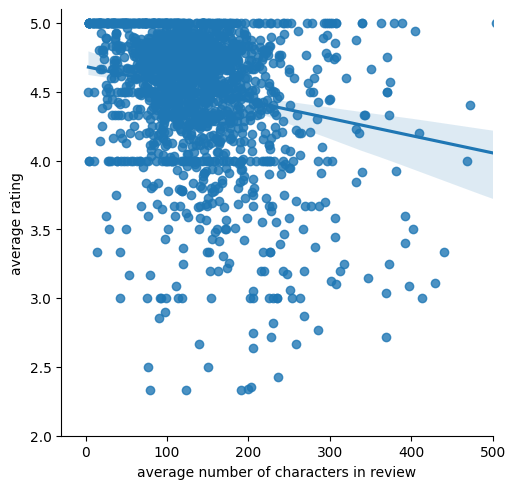

In [14]:
# Show scatter plot with linear model
sns.lmplot(x="av_review_len", y="av_rating", data = analysis).set(xlim=(-30, 500), ylim=(2,5.1), xlabel="average number of characters in review", ylabel="average rating")

In [15]:
reviews_by_course_df = reviews_by_course_df.drop(columns=['Review_len'])
reviews_by_course_df.head()

,CourseId,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


In [16]:
def reduce_size(x):
    if len(x.index) > 15000:
        return x.sample(n=int(len(x.index)/10))
    else:
        return x

reviews_by_course_df = reviews_by_course_df.groupby('Label').apply(reduce_size).reset_index(drop=True)
reviews_by_course_df['Label'].value_counts()


5    10651
3     5923
1     2867
2     2554
4     2246
Name: Label, dtype: int64

In [17]:
reviews_by_course_df.shape

(24241, 3)

# Data preprocessing

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
reviews_by_course = pd.read_csv('reviews_by_course.csv')

# Remove duplicates
reviews_by_course = reviews_by_course.drop_duplicates()


In [21]:
import numpy as np
# create a pivot table to get the user-item matrix
user_item_matrix = pd.pivot_table(reviews_by_course_df, values='Label', index='CourseId', columns='Review')

# fill the missing values with 0
user_item_matrix = user_item_matrix.fillna(0)

# convert the matrix to a numpy array
user_item_matrix = np.array(user_item_matrix)

In [30]:
user_item_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
from sklearn.model_selection import train_test_split

# Split the user-item-matrix into training and testing sets
train_data, test_data = train_test_split(user_item_matrix, test_size=0.2, random_state=42)


In [36]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(train_data)


In [44]:
from sklearn.neighbors import NearestNeighbors

# Define the number of neighbors to use
k = 5

# Initialize the KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=k)

# Fit the model on the training set
knn_model.fit(train_data)

# Make predictions for the test set
distances, indices = knn_model.kneighbors(test_data, return_distance=True)

# Compute the average rating for each item based on the ratings of the k most similar users
item_predictions = []
for i in range(len(test_data)):
    user_ratings = test_data[i]
    item_indices = indices[i]
    item_predictions.append(np.mean(train_data[item_indices], axis=0))

# Compute the RMSE of the predictions
rmse = mean_squared_error(test_data, item_predictions, squared=False)
print('RMSE:', rmse)


RMSE: 0.06650846645202016


In [48]:
# Make predictions for the test set
distances, indices = knn_model.kneighbors(test_data, return_distance=True)

# Initialize the item predictions list
item_predictions = []

# Loop through each user in the test set
for i in range(len(test_data)):
    # Get the user's ratings for the items in the test set
    user_ratings = test_data[i]
    # Get the indices of the k most similar users
    item_indices = indices[i]
    # Get the distances to the k most similar users
    item_distances = distances[i]
    # Calculate the weighted average of the ratings of the k most similar users
    item_prediction = np.dot(item_distances, train_data[item_indices]) / np.sum(item_distances)
    # Add the predicted rating to the item predictions list
    item_predictions.append(item_prediction)

# Convert the item predictions list to a numpy array
item_predictions = np.array(item_predictions)

# Print the item predictions
print('Item predictions:', item_predictions)


Item predictions: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [59]:


# print the pivot table
print(user_item_matrix)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
